### Understand the features and relationships between features in the SAMueL dataset

We will impute data from SSNAP by replacing missing (NaN) values and encoding categorical variables.

Once have the data in this format, use it to understand the variables and relationships between features.

The aim is to identify features to drop from the dataset that will be used by the model. This is with the focus of being able to better explain the models.

### Import libraries

In [31]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Definte data directory

In [4]:
# location of the raw data and additional files. Will need to be changed by user.

data_loc = './data/'

### Import Data 

In [5]:
filename = 'MichaelAllen_HQIP425_300323.csv'
data = pd.read_csv(data_loc + filename,low_memory=False)

In [6]:
len(data.columns)

81

In [7]:
data.head()

,TeamName,AgeUnder40,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,...,S7StrokeUnitDeath,S7RankinDischarge,S8Rankin6Month,S8Rankin6MonthNK,CallConnectedtoArrivalMinutes,ArrivalPatientLocationtoArrivalMinutes,DeparturePatientLocationtoArrivalMinutes,WheelsStoptoArrivalMinutes,MobileDatatoArrivalMinutes,S1PreHospitalImpression
0,Northumbria Specialist Emergency Care Hospital...,0,0,0,0,0,0,0,0,1,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northumbria Specialist Emergency Care Hospital...,0,0,0,0,0,0,0,1,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,West Suffolk Hospital,0,0,0,0,0,0,0,0,0,...,Y,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,West Suffolk Hospital,0,0,0,0,0,0,0,1,0,...,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Royal Victoria Infirmary,0,0,0,0,0,0,0,0,1,...,NaN,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.columns

Index(['TeamName', 'AgeUnder40', 'Age40to44', 'Age45to49', 'Age50to54',
       'Age55to59', 'Age60to64', 'Age65to69', 'Age70to74', 'Age75to79',
       'Age80to84', 'Age85to89', 'AgeOver90', 'S1Gender',
       'OnsettoArrivalMinutes', 'S1OnsetDateType', 'S1OnsetTimeType',
       'S1ArriveByAmbulance', 'FirstArrivalMonthYear', 'FirstArrivalWeekday',
       'FirstArrivalTime', 'S2CoMCongestiveHeartFailure', 'S2CoMHypertension',
       'S2CoMAtrialFibrillation', 'S2CoMDiabetes', 'S2CoMStrokeTIA',
       'S2CoMAFAntiplatelet', 'S2CoMAFAnticoagulent',
       'S2CoMAFAnticoagulentVitK', 'S2CoMAFAnticoagulentDOAC',
       'S2CoMAFAnticoagulentHeparin', 'S2INR', 'S2INRHigh', 'S2INRNK',
       'S2NewAFDiagnosis', 'S2RankinBeforeStroke', 'S2NihssArrival',
       'S2NihssArrivalLoc', 'S2NihssArrivalLocQuestions',
       'S2NihssArrivalLocCommands', 'S2NihssArrivalBestGaze',
       'S2NihssArrivalVisual', 'S2NihssArrivalFacialPalsy',
       'S2NihssArrivalMotorArmLeft', 'S2NihssArrivalMotorArmRight

(array([5.052e+03, 3.290e+02, 4.200e+01, 1.100e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  39.8,  78.6, 117.4, 156.2, 195. , 233.8, 272.6, 311.4,
        350.2, 389. ]),
 <BarContainer object of 10 artists>)

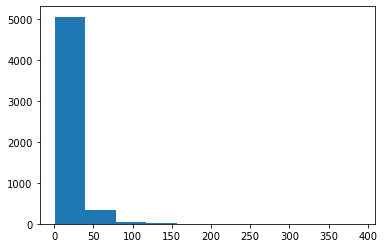

In [19]:
plt.hist(data['ArrivalToDeathDays'][data['S2Thrombolysis']=="Y"][data['ArrivalToDeathDays']>=1])

In [ ]:
'S7StrokeUnitDeath'

In [21]:
data['ArrivalToDeathDays'][data['S2Thrombolysis']=="Y"][data['ArrivalToDeathDays']<1].count()

119

In [32]:
math.isnan(data['ArrivalToDeathDays'][data['S2Thrombolysis']=="Y"].iloc[0])

True

In [33]:
data['S7DischargeType'].unique()

array(['H', 'TC', 'D', 'CH', 'TCN', 'TN', nan, 'SE'], dtype=object)

(array([   2.,    3.,   11.,    2.,    8.,   16.,   21.,   79., 1701.,
         748.]),
 array([-2132. , -1903.5, -1675. , -1446.5, -1218. ,  -989.5,  -761. ,
         -532.5,  -304. ,   -75.5,   153. ]),
 <BarContainer object of 10 artists>)

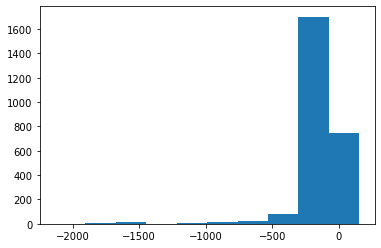

In [34]:
plt.hist(data['ArrivaltoThrombolysisMinutes'] - data['DoortoThrombolysisMinutes'])

### Import variable2type.json

This dictionary maps variables used in the prediction to their data type. Variables that do not appear in the dictionary are not used for the prediction and, apart from 'S2 Thrombolysis', will be dropped.

In [6]:
with open(data_loc + 'variable2type.json', 'r') as fp:
    variable2type = json.load(fp)

In [7]:
for feature in data.columns:
    
    if feature == 'S2Thrombolysis':
        
        continue
    
    if feature not in variable2type:

        data = data.drop(feature, axis=1)
    

In [8]:
data.columns

Index(['StrokeTeam', 'Pathway', 'S1AgeOnArrival', 'MoreEqual80y', 'S1Gender',
       'S1Ethnicity', 'S1OnsetInHospital', 'S1OnsetToArrival_min',
       'S1OnsetDateType', 'S1OnsetTimeType', 'S1ArriveByAmbulance',
       'S1AdmissionHour', 'S1AdmissionDay', 'S1AdmissionQuarter',
       'S1AdmissionYear', 'CongestiveHeartFailure', 'Hypertension',
       'AtrialFibrillation', 'Diabetes', 'StrokeTIA', 'AFAntiplatelet',
       'AFAnticoagulent', 'AFAnticoagulentVitK', 'AFAnticoagulentDOAC',
       'AFAnticoagulentHeparin', 'S2NewAFDiagnosis', 'S2RankinBeforeStroke',
       'Loc', 'LocQuestions', 'LocCommands', 'BestGaze', 'Visual',
       'FacialPalsy', 'MotorArmLeft', 'MotorArmRight', 'MotorLegLeft',
       'MotorLegRight', 'LimbAtaxia', 'Sensory', 'BestLanguage', 'Dysarthria',
       'ExtinctionInattention', 'S2NihssArrival', 'S2BrainImagingTime_min',
       'S2StrokeType', 'S2Thrombolysis', 'S2TIAInLastMonth'],
      dtype='object')

In [9]:
len(data.columns)

47

### Import variable2method.json 

In [10]:
with open(data_loc + 'variable2method.json', 'r') as fp:
    variable2method = json.load(fp)

In [11]:
variable2method

{'S1OnsetToArrival_min': '9999',
 'S1ArriveByAmbulance': 'missing',
 'AFAntiplatelet': 'missing',
 'AFAnticoagulent': 'missing',
 'AFAnticoagulentVitK': 'missing',
 'AFAnticoagulentDOAC': 'missing',
 'AFAnticoagulentHeparin': 'missing',
 'S2NewAFDiagnosis': 'missing',
 'LocQuestions': 'zero',
 'LocCommands': 'zero',
 'BestGaze': 'zero',
 'Visual': 'zero',
 'FacialPalsy': 'zero',
 'MotorArmLeft': 'zero',
 'MotorArmRight': 'zero',
 'MotorLegLeft': 'zero',
 'MotorLegRight': 'zero',
 'LimbAtaxia': 'zero',
 'Sensory': 'zero',
 'BestLanguage': 'zero',
 'Dysarthria': 'zero',
 'ExtinctionInattention': 'zero',
 'S2NihssArrival': 'zero',
 'S2BrainImagingTime_min': '9999',
 'S2StrokeType': 'missing',
 'S2TIAInLastMonth': 'missing'}

In [12]:
variable2method['S2NihssArrival'] = 'sum'

Values in this dictionary correspond to the following methods:

- 9999: replace missing values with 9999
- zero: replace missing values with zero
- missing: replace missing values with a text label 'missing' 

## Imputation 

#### Step 1: Replace all NaN values according to the process in variable2method 

In [13]:
data.columns[27:43]

Index(['Loc', 'LocQuestions', 'LocCommands', 'BestGaze', 'Visual',
       'FacialPalsy', 'MotorArmLeft', 'MotorArmRight', 'MotorLegLeft',
       'MotorLegRight', 'LimbAtaxia', 'Sensory', 'BestLanguage', 'Dysarthria',
       'ExtinctionInattention', 'S2NihssArrival'],
      dtype='object')

In [14]:
imputed = data.copy()

for variable, method in variable2method.items():
    
    series = imputed[variable].copy()
    missing = series.isna()
    
    if method=='missing':
        
        series[missing] = 'missing'
        
    elif method=='zero':
        
        series[missing] = 0
        
    elif method=='9999':
        
        series[missing] = 9999
        
    elif method=='sum':
        
        series[missing] = imputed[data.columns[27:43]].sum(axis=1)
        
    else:
        raise Exception('{0} not a valid method'.format(method))
        
    imputed[variable] = series

#### Step 2: Use one-hot-encoding to encode all categorical and binary (text) variables 

#### If preparing data for neural network or train test by hospital, uncomment lines 9 and 10

In [15]:
encoded = imputed.copy()

variable2family={}

for variable, type_ in variable2type.items():
    
    if type_ in ['Categorical', 'Binary']:
        
        if variable == 'StrokeTeam':
            continue

        to_code = encoded[variable]
        
        if type_ == 'Binary': 
            
            coded = pd.get_dummies(to_code, prefix=variable)
            
        else:
            coded = pd.get_dummies(to_code, prefix=variable)
        
        encoded = pd.concat([encoded, coded], axis=1)
        encoded.drop([variable], axis=1, inplace=True)
        
        variable2family[variable] = coded.columns.values.tolist()

In [16]:
with open(data_loc + 'variable2family.json', 'w') as f: 
    json.dump(variable2family, f) 

#### Step 3: Encode 'S2Thrombolysis' to target 

In [17]:
target=[]
for outcome in encoded.S2Thrombolysis.values:
    
    if outcome in ['No', 'No but']:
        
        target.append(0)
        
    elif outcome == 'Yes': 
        
        target.append(1)
        
encoded['S2Thrombolysis'] = target

#### Step 4: Change 'S1AgeOnArrival' to midpoint

In [18]:
ages = []
for group in encoded.S1AgeOnArrival.values:
    minage, maxage = group.split(',')
    
    minage = int(''.join(list(minage)[1:]))
    maxage = int(''.join(list(maxage)[:-1]))
    
    ages.append(np.median([minage,maxage]))
    
encoded['S1AgeOnArrival'] = ages

### Restrict data to hospitals with at least 300 admissions and 10 thrombolysis

In [19]:
# Set up list for dataframe groups
keep = []

groups = encoded.groupby('StrokeTeam') # creates a new object of groups of data

for index, group_df in groups: # each group has an index and a dataframe of data
    
    # Skip if total admiision less than 300 or total thrombolysis < 10
    if (group_df.shape[0] < 300) or (group_df['S2Thrombolysis'].sum() < 10):
        continue
    
    else: 
        keep.append(group_df)

# Concatenate output
filtered_data = pd.DataFrame()
filtered_data = pd.concat(keep)

### Create a dataframe that restricts data to only stroke onset out of hospital with onset to arrival of 4 hours or less

This is the restrictions applied to the dataset that is used to train the models (done in "2_create_kfold_data.ipynb").

Have a version of the dataframe in this notebook to check the number of patients that would be removed due to some filters we are considering (later in the code below).

In [20]:
filtered_process_data = filtered_data[
                            (filtered_data['S1OnsetInHospital_No']==1 
                            & (filtered_data['S1OnsetToArrival_min']<= 240))]

## Learning about our data
### Motivation to learn which columns to drop

In SAMueL2 we will focus more on the explanability of the models. We will do this by looking at the importance of the feature in the model, and also the features SHAP value (the contribution of a feature to the target value). Therefore it is now more useful for us to remove any feature with a near perfect correlation with another feature. Say we have two binary variables, one recording if the patient is female and another recording is a patient is male. These both provide the model with the same information and so one model may give "female" a score of 10, amd "male" a score of 0, and another may give both a score of 5. When look at the features in terms of ranked importance, having the data represented in this way complicates the interpretation.

Calculate the correlation matrix. This contains the correlation for every pair of features. Our first approach is for any pair with a correlation of 1, only include one of the columns. Where the columns are for binary features we have decided to keep the positive column.

#### Correlation matrix:

In [21]:
corr_matrix = filtered_data.corr()
corr_matrix

,Pathway,S1AgeOnArrival,S1OnsetToArrival_min,S2RankinBeforeStroke,Loc,LocQuestions,LocCommands,BestGaze,Visual,FacialPalsy,...,S2NewAFDiagnosis_No,S2NewAFDiagnosis_Yes,S2NewAFDiagnosis_missing,S2StrokeType_Infarction,S2StrokeType_Primary Intracerebral Haemorrhage,S2StrokeType_missing,S2TIAInLastMonth_No,S2TIAInLastMonth_No but,S2TIAInLastMonth_Yes,S2TIAInLastMonth_missing
Pathway,1.000000,-0.023159,-0.000804,-0.036467,-0.039827,-0.030580,-0.032156,-0.029681,-0.017991,-0.009815,...,-0.098733,-0.024122,0.104074,0.013512,-0.013724,0.000013,0.005980,-0.005372,-0.000174,-0.003451
S1AgeOnArrival,-0.023159,1.000000,0.001376,0.355922,0.122708,0.229008,0.179358,0.120558,0.096697,0.074663,...,-0.094955,0.053791,0.075767,-0.013737,0.015089,-0.005597,0.036863,0.024576,-0.001305,-0.042393
S1OnsetToArrival_min,-0.000804,0.001376,1.000000,-0.001221,-0.001077,-0.002980,-0.002384,-0.002080,-0.001829,-0.003360,...,0.002523,-0.001035,-0.002138,0.001413,-0.001743,0.001515,-0.002026,0.001539,0.000158,0.001248
S2RankinBeforeStroke,-0.036467,0.355922,-0.001221,1.000000,0.170988,0.268608,0.221005,0.119501,0.083522,0.080976,...,-0.036941,0.000340,0.035980,-0.020783,0.018959,0.010545,0.090999,0.040320,0.001940,-0.098430
Loc,-0.039827,0.122708,-0.001077,0.170988,1.000000,0.401399,0.524578,0.372313,0.230749,0.180382,...,-0.033281,0.009075,0.029644,-0.239053,0.239520,0.015921,0.000793,0.009909,-0.013113,-0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S2StrokeType_missing,0.000013,-0.005597,0.001515,0.010545,0.015921,-0.008473,-0.002106,-0.009547,-0.009074,-0.022857,...,-0.000942,-0.002304,0.001648,-0.175815,-0.024960,1.000000,-0.001999,0.001694,0.009474,-0.001084
S2TIAInLastMonth_No,0.005980,0.036863,-0.002026,0.090999,0.000793,0.020935,0.009300,-0.004781,0.004765,-0.000052,...,-0.022162,-0.014063,0.026093,0.001848,-0.001469,-0.001999,1.000000,-0.028164,-0.018429,-0.899093
S2TIAInLastMonth_No but,-0.005372,0.024576,0.001539,0.040320,0.009909,0.011930,0.011344,0.004500,0.006308,0.001048,...,-0.008386,-0.005592,0.009960,-0.004544,0.004270,0.001694,-0.028164,1.000000,-0.006961,-0.339602
S2TIAInLastMonth_Yes,-0.000174,-0.001305,0.000158,0.001940,-0.013113,-0.013112,-0.013299,-0.009110,-0.007232,-0.004963,...,-0.003436,-0.004624,0.004818,0.012233,-0.014351,0.009474,-0.018429,-0.006961,1.000000,-0.222222


Here's the code to look at the ranked correlation values for a particular feature

In [22]:
print (corr_matrix['S1OnsetToArrival_min'].sort_values())

S1OnsetDateType_Precise               -0.014053
S1OnsetTimeType_Precise               -0.012887
S2Thrombolysis                        -0.010115
S1OnsetInHospital_No                  -0.007131
S1OnsetTimeType_Best estimate         -0.007100
                                         ...   
S1OnsetInHospital_Yes                  0.007131
S1OnsetDateType_Stroke during sleep    0.008899
S1OnsetDateType_Best estimate          0.008993
S1OnsetTimeType_Not known              0.020393
S1OnsetToArrival_min                   1.000000
Name: S1OnsetToArrival_min, Length: 101, dtype: float64


Here's the code to look at the correlation value for a particular pair of features

In [23]:
corr_matrix.loc['S1OnsetToArrival_min']["MoreEqual80y_Yes"]

0.0007465883989168095

Let's look at all of the feature pairs that have a correlation of +/- 1 (by using the absolute value of the correlation matrix).

I used code for a function "getIndexes" from https://thispointer.com/python-find-indexes-of-an-element-in-pandas-dataframe/ and edited it to take a third argument to ignore the diagonal (because features with themselves will have a value 1, and we are not interetsted in this result).

In [24]:
def getIndexes(dfObj, value, ignore_diagonal=False):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            if ignore_diagonal and row != col: #not return the diagonal
                listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

Get list of index positions (pair of feature names) of all occurrences of 1 in the dataframe, not on the diagonal.

Use absolute to also include -1 occurences.

In [25]:
listOfPositions = getIndexes(corr_matrix.abs(), 1, True)

#Print the feature pairings found
print(f'There are {len(listOfPositions)} feature pairings with correlation of '
      f'+/- 1: ')
listOfPositions

There are 8 feature pairings with correlation of +/- 1: 


[('S1ArriveByAmbulance_missing', 'S1OnsetInHospital_Yes'),
 ('S1OnsetInHospital_Yes', 'S1ArriveByAmbulance_missing'),
 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentDOAC_missing'),
 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentDOAC_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentHeparin_missing'),
 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentHeparin_missing')]

Odd. Why aren't there correlation of 1 for:
MoreEqual80y_No vs. MoreEqual80y_Yes
S1Gender_Female vs. S1Gender_Male? 
S1OnsetInHospital_No vs. S1OnsetInHospital_Yes

Investigate by looking at the correlation value for these feature pairings that expected to have a 1.

In [26]:
corr_matrix.loc["MoreEqual80y_No"]["MoreEqual80y_Yes"]

-0.9999999999999999

In [27]:
corr_matrix.loc["S1Gender_Female"]["S1Gender_Male"]

-0.9999999999999999

In [28]:
corr_matrix.loc["S1OnsetInHospital_No"]["S1OnsetInHospital_Yes"]

-1.000000000000001

Is this is due to rounding, or due to missing values?

In [29]:
print(f'Number of patients: {filtered_data.shape[0]}')
print("If the number of 1 recorded in the two columns equal the number of "
      "patients then it shows there should be a correlation value of 1 and "
      "it's a rounding issue")

print()
print(f'Number of 1 recorded in the two columns for MoreEqual80y: '
      f'{filtered_data[["MoreEqual80y_No","MoreEqual80y_Yes"]].sum().sum()}')
print(f'Number of 1 recorded in the two columns for Gender: '
      f'{filtered_data[["S1Gender_Female","S1Gender_Male"]].sum().sum()}')
print(f'Number of 1 recorded in the two columns for OnsetInHosptial: '
      f'{filtered_data[["S1OnsetInHospital_No","S1OnsetInHospital_Yes"]].sum().sum()}')

Number of patients: 239505
If the number of 1 recorded in the two columns equal the number of patients then it shows there should be a correlation value of 1 and it's a rounding issue

Number of 1 recorded in the two columns for MoreEqual80y: 239505
Number of 1 recorded in the two columns for Gender: 239505
Number of 1 recorded in the two columns for OnsetInHosptial: 239505


Due to rounding. So better to identify pairings of features based on a range around 1 and -1.

Edit the getIndexes function to find values within a range: getIndexesRange.

In [30]:
def getIndexesRange(dfObj, min_value, max_value, ignore_diagonal=False):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = (dfObj >= min_value) & (dfObj <= max_value)
#    result = dfObj.between(min_value, max_value)#.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            if ignore_diagonal and row != col: # not return the diagonal
                listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

Get list of index positions (pair of feature names) of all occurrences between 0.99-1.01 in the dataframe, not on the diagonal. Use absolute to also include -1.01 to -0.99 

In [31]:
min_value = 0.99
max_value = 1.01
listOfPositions = getIndexesRange(corr_matrix.abs(), min_value, max_value, True)

print(f'There are {len(listOfPositions)} feature pairings with correlation in '
      f'range {min_value} to {max_value} (+/-) in Dataframe : ')
listOfPositions

There are 36 feature pairings with correlation in range 0.99 to 1.01 (+/-) in Dataframe : 


[('MoreEqual80y_Yes', 'MoreEqual80y_No'),
 ('MoreEqual80y_No', 'MoreEqual80y_Yes'),
 ('S1Gender_Male', 'S1Gender_Female'),
 ('S1Gender_Female', 'S1Gender_Male'),
 ('S1OnsetInHospital_Yes', 'S1OnsetInHospital_No'),
 ('S1ArriveByAmbulance_missing', 'S1OnsetInHospital_No'),
 ('S1OnsetInHospital_No', 'S1OnsetInHospital_Yes'),
 ('S1ArriveByAmbulance_missing', 'S1OnsetInHospital_Yes'),
 ('S1OnsetInHospital_No', 'S1ArriveByAmbulance_missing'),
 ('S1OnsetInHospital_Yes', 'S1ArriveByAmbulance_missing'),
 ('CongestiveHeartFailure_Yes', 'CongestiveHeartFailure_No'),
 ('CongestiveHeartFailure_No', 'CongestiveHeartFailure_Yes'),
 ('Hypertension_Yes', 'Hypertension_No'),
 ('Hypertension_No', 'Hypertension_Yes'),
 ('AtrialFibrillation_Yes', 'AtrialFibrillation_No'),
 ('AFAntiplatelet_missing', 'AtrialFibrillation_No'),
 ('AtrialFibrillation_No', 'AtrialFibrillation_Yes'),
 ('AFAntiplatelet_missing', 'AtrialFibrillation_Yes'),
 ('Diabetes_Yes', 'Diabetes_No'),
 ('Diabetes_No', 'Diabetes_Yes'),
 ('Stro

Now need to understand the correlations that have been returned.

First look at the binary features, with the decisions about which feature to keep:

 ('MoreEqual80y_Yes', 'MoreEqual80y_No'),\
 ('MoreEqual80y_No', 'MoreEqual80y_Yes'),\
Keep MoreEqual80y_Yes\
Remove MoreEqual80y_No

 ('S1Gender_Male', 'S1Gender_Female'),\
 ('S1Gender_Female', 'S1Gender_Male'),\
Keep S1Gender_Female\
Remove S1Gender_Male

 ('S1OnsetInHospital_Yes', 'S1OnsetInHospital_No'),\
 ('S1OnsetInHospital_No', 'S1OnsetInHospital_Yes'),\
Keep S1OnsetInHospital_Yes\
Remove S1OnsetInHospital_No

 ('CongestiveHeartFailure_Yes', 'CongestiveHeartFailure_No'),\
 ('CongestiveHeartFailure_No', 'CongestiveHeartFailure_Yes'),\
Keep CongestiveHeartFailure_Yes\
Remove CongestiveHeartFailure_No

 ('Hypertension_Yes', 'Hypertension_No'),\
 ('Hypertension_No', 'Hypertension_Yes'),\
Keep Hypertension_Yes\
Remove Hypertension_No

 ('AtrialFibrillation_Yes', 'AtrialFibrillation_No'),\
 ('AtrialFibrillation_No', 'AtrialFibrillation_Yes'),\
Keep AtrialFibrillation_Yes\
Remove AtrialFibrillation_No

 ('Diabetes_Yes', 'Diabetes_No'),\
 ('Diabetes_No', 'Diabetes_Yes'),\
Keep Diabetes_Yes\
Remove Diabetes_No

 ('StrokeTIA_Yes', 'StrokeTIA_No'),\
 ('StrokeTIA_No', 'StrokeTIA_Yes'),\
Keep StrokeTIA_Yes\
Remove StrokeTIA_No

Here are the more complex correlations:

## Complex correlation 1.

 ('S1ArriveByAmbulance_missing', 'S1OnsetInHospital_No'),
 ('S1OnsetInHospital_No', 'S1ArriveByAmbulance_missing'),

 ('S1ArriveByAmbulance_missing', 'S1OnsetInHospital_Yes'),
 ('S1OnsetInHospital_Yes', 'S1ArriveByAmbulance_missing'),

If have stroke onset in hospital then the arrive by ambulance is missing.\
'S1ArriveByAmbulance_missing' == 'S1OnsetInHospital_Yes'\
'S1ArriveByAmbulance_missing' is opposite to 'S1OnsetInHospital_No'

#### Decision
Keep 'S1OnsetInHospital_Yes'\
Remove 'S1OnsetInHospital_No'\
Remove 'S1ArriveByAmbulance_missing'

## Complex correlation 2.

 ('AFAntiplatelet_missing', 'AtrialFibrillation_No'),
 ('AtrialFibrillation_No', 'AFAntiplatelet_missing'),

 ('AFAntiplatelet_missing', 'AtrialFibrillation_Yes'),
 ('AtrialFibrillation_Yes', 'AFAntiplatelet_missing'),
 
Only if have 'AtrialFibrillation_Yes' do they need there to be a value in either 'AFAntiplatelet_No', 'AFAntiplatelet_No but' or 'AFAntiplatelet_Yes'. 
When 'AtrialFibrillation_No' = 1 then 'AFAntiplatelet_missing' = 1 (and the other AFs are 0)
When 'AtrialFibrillation_Yes' = 1 then 'AFAntiplatelet_missing' = 0 (and one of the other AFs are 1)

Description: "Only available if "Yes" to Atrial Fibrillation (Q2.1.3). Whether the patient was on antiplatelet medication prior to admission"

#### Decision

Remove 'AFAntiplatelet_missing'\
Remove 'AtrialFibrillation_No' (as decided above)\
Keep 'AtrialFibrillation_Yes' (as decided above)\

Note: The feature "AFAnticoagulent" has a similar description about only available if "Yes" to Atrial Fibrillation (Q2.1.3). However this feature also has a change in the rule from date 01-Dec-2017: Prior to 01-Dec-2017: Only available if "Yes" to Atrial Fibrillation (Q2.1.3); From 01-Dec-2017: available even if patient is not in Atrial Fibrillation prior to admission. Whether the patient was on anticoagulant medication prior to admission.

However it does not appear in the correlation list (has correlation of 0.5 with 'AFAntiplatelet_missing') due to the change in rule at the date.
 
So can not remove 'AFAnticoagulent_missing' in the same way, as it's not bound to Atrial Fibrillation for all dates. 

The sum of the four columns (no, no but, yes, missing) = 1. Did consider whether that was grounds to remove it - but decided that we will not because when come to explainability, lose which one was missing for the explanability.

## Explanation 3.

Description for "AFAnticoagulentDOAC", "AFAnticoagulentVitK", AFAnticoagulentHeparin" : 
"If the patient was receiving anticoagulant medication, was it THIS antagonist".

"If the patient was receiving anticoagulant medication, was it VitK anticoagulants". Note: Before give thrombolysis they need to measure time taken to blood clot as not want a risk of a bleed. If te clotting is too slow, then if the patient was taking warfarin (given to help stop blood clotting, and is a VitK antagonist) they can give VitK to speed clotting time back up, and so allow patient to pass this measure and get thrombolysis.

"If the patient was receiving anticoagulant medication, was it direct oral anticoagulants (DOACs)". Note: Do not think that there is an undo for this

"If the patient was receiving anticoagulant medication, was it Heparin". Note: Think there may be an undo for this - could be snake venom.

However, the data does not behave as would expect from this description. Would expect that when AFAnticoagulent_Yes = 1, for each of these three AFAnticoagulent to be either Y or N, but they are often recorded as "missing". Note: See cell below reporting about the "28311" patients.

Perfect match. Identical across all missing columns (see following 3 barcharts).\
 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentDOAC_missing'),

 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentHeparin_missing'),

 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentDOAC_missing'),
 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentHeparin_missing')


AFAnticoagulentDOAC_missing vs. AFAnticoagulentVitK_missing


<AxesSubplot:>

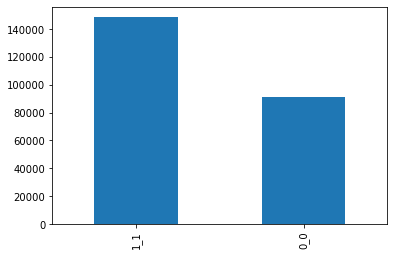

In [32]:
v1 = 'AFAnticoagulentDOAC_missing'
v2 = 'AFAnticoagulentVitK_missing'

print(f'{v1} vs. {v2}')

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data['AFAnticoagulentDOAC_missing'].astype(str) + '_' + 
      filtered_data['AFAnticoagulentVitK_missing'].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

AFAnticoagulentHeparin_missing vs. AFAnticoagulentVitK_missing


<AxesSubplot:>

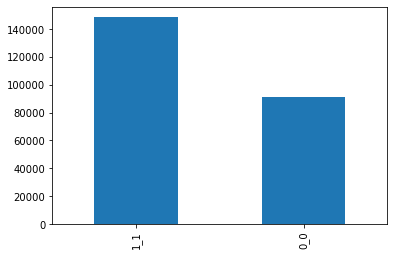

In [33]:
v1 = 'AFAnticoagulentHeparin_missing'
v2 = 'AFAnticoagulentVitK_missing'

print(f'{v1} vs. {v2}')

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data[v1].astype(str) + '_' + filtered_data[v2].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

AFAnticoagulentHeparin_missing vs. AFAnticoagulentDOAC_missing


<AxesSubplot:>

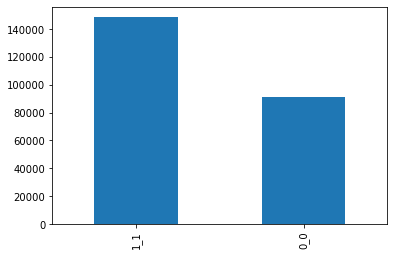

In [34]:
v1 = 'AFAnticoagulentHeparin_missing'
v2 = 'AFAnticoagulentDOAC_missing'

print(f'{v1} vs. {v2}')

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data[v1].astype(str) + '_' + filtered_data[v2].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

## Explanation 4

 ('AFAnticoagulentHeparin_No', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentHeparin_No'),

 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentHeparin_No'),
 ('AFAnticoagulentHeparin_No', 'AFAnticoagulentDOAC_missing'),

 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentHeparin_No'),
 ('AFAnticoagulentHeparin_No', 'AFAnticoagulentHeparin_missing')]
 
Patients are either Heparin_No = 0 with missing = 1
Or  Heparin_No = 1 with missing = 0

Only 206 patient that don't fit in this, hence the good correlation.

AFAnticoagulentHeparin_No vs AFAnticoagulentVitK_missing

206 patients AFAnticoagulentHeparin_No = 0 and AFAnticoagulentVitK_missing = 0
148602 patients AFAnticoagulentHeparin_No = 0 and AFAnticoagulentVitK_missing = 1
90697 patients AFAnticoagulentHeparin_No = 1 and AFAnticoagulentVitK_missing = 0
0 patients AFAnticoagulentHeparin_No = 1 and AFAnticoagulentVitK_missing = 1


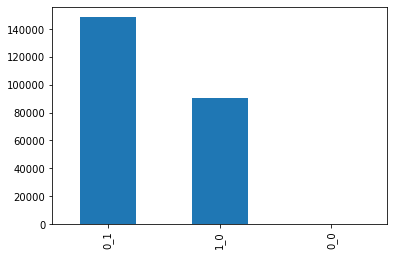

In [35]:
v1 = 'AFAnticoagulentHeparin_No'
v2 = 'AFAnticoagulentVitK_missing'

print(f'{v1} vs {v2}')

print ()

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data[v1].astype(str) + '_' + filtered_data[v2].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

for i in range(2):
    for j in range(2):
        mask1 = filtered_data[v1] == i
        mask2 = filtered_data[v2] == j
        mask = mask1 * mask2
        print(f'{mask.sum()} patients {v1} = {i} and {v2} = {j}')

AFAnticoagulentHeparin_No vs AFAnticoagulentDOAC_missing

206 patients AFAnticoagulentHeparin_No = 0 and AFAnticoagulentDOAC_missing = 0
148602 patients AFAnticoagulentHeparin_No = 0 and AFAnticoagulentDOAC_missing = 1
90697 patients AFAnticoagulentHeparin_No = 1 and AFAnticoagulentDOAC_missing = 0
0 patients AFAnticoagulentHeparin_No = 1 and AFAnticoagulentDOAC_missing = 1


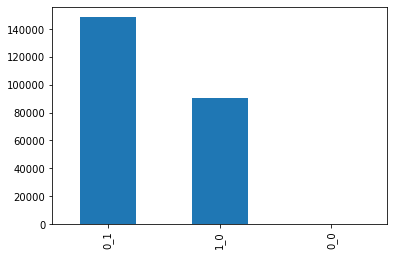

In [36]:
v1 = 'AFAnticoagulentHeparin_No'
v2 = 'AFAnticoagulentDOAC_missing'

print(f'{v1} vs {v2}')

print ()

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data[v1].astype(str) + '_' + filtered_data[v2].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

for i in range(2):
    for j in range(2):
        mask1 = filtered_data[v1] == i
        mask2 = filtered_data[v2] == j
        mask = mask1 * mask2
        print(f'{mask.sum()} patients {v1} = {i} and {v2} = {j}')

AFAnticoagulentHeparin_missing vs AFAnticoagulentHeparin_No

206 patients AFAnticoagulentHeparin_missing = 0 and AFAnticoagulentHeparin_No = 0
90697 patients AFAnticoagulentHeparin_missing = 0 and AFAnticoagulentHeparin_No = 1
148602 patients AFAnticoagulentHeparin_missing = 1 and AFAnticoagulentHeparin_No = 0
0 patients AFAnticoagulentHeparin_missing = 1 and AFAnticoagulentHeparin_No = 1


<AxesSubplot:>

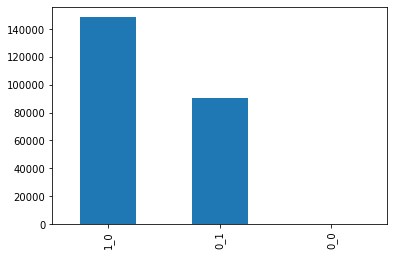

In [37]:
v1 = 'AFAnticoagulentHeparin_missing'
v2 = 'AFAnticoagulentHeparin_No'

print(f'{v1} vs {v2}')

print ()

for i in range(2):
    for j in range(2):
        mask1 = filtered_data[v1] == i
        mask2 = filtered_data[v2] == j
        mask = mask1 * mask2
        print(f'{mask.sum()} patients {v1} = {i} and {v2} = {j}')

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data[v1].astype(str) + '_' + filtered_data[v2].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

### Correlation in a group

Finding groups of features (>2) where patient has exactly only one of them chosen.

There are more examples where the sum of a number of columns = 1
1) S1OnsetTimeType_Best estimate, S1OnsetTimeType_Not known, S1OnsetTimeType_Precise
2) S1OnsetDateType_Best estimate, S1OnsetDateType_Precise, S1OnsetDateType_Stroke during sleep
3) "AFAnticoagulent_No","AFAnticoagulent_No but","AFAnticoagulent_Yes","AFAnticoagulent_missing"
4) "AFAnticoagulentVitK_No","AFAnticoagulentVitK_Yes", "AFAnticoagulentVitK_missing"
5) "AFAnticoagulentDOAC_No","AFAnticoagulentDOAC_Yes","AFAnticoagulentDOAC_missing"
6) "AFAnticoagulentHeparin_No","AFAnticoagulentHeparin_Yes","AFAnticoagulentHeparin_missing"
7) S2StrokeType_Infarction, S2StrokeType_Primary Intracerebral Haemorrhage, "S2StrokeType_missing [note: see separate section on this group later in the notebook]

Decided to not drop one of these as it does not help the explainability of the model. Left in for completeness to see the groups looked at.

In [38]:
column_names = ["AFAnticoagulent_No","AFAnticoagulent_No but",
                "AFAnticoagulent_Yes","AFAnticoagulent_missing"]

print(f'The number of patients is {filtered_data.shape[0]}, and the sum of the '
      f'four AFAnticoagulents is '
      f'{filtered_data[column_names].sum(axis=1).sum()}')
print(f'If the same number, means that each patient has exactly one chosen.')
print(f'If so, can one of the four be dropped?')

The number of patients is 239505, and the sum of the four AFAnticoagulents is 239505
If the same number, means that each patient has exactly one chosen.
If so, can one of the four be dropped?


In [39]:
column_names = ["AFAnticoagulentVitK_No","AFAnticoagulentVitK_Yes",
                "AFAnticoagulentVitK_missing"]
print(f'The number of patients is {filtered_data.shape[0]}, and the sum of the '
      f'three VitK AFAnticoagulents is '
      f'{filtered_data[column_names].sum(axis=1).sum()}')
print(f'If the same number, means that each patient has exactly one chosen.')
print(f'If so, can one of the three be dropped?')

The number of patients is 239505, and the sum of the three VitK AFAnticoagulents is 239505
If the same number, means that each patient has exactly one chosen.
If so, can one of the three be dropped?


In [40]:
column_names = ["AFAnticoagulentDOAC_No","AFAnticoagulentDOAC_Yes",
                "AFAnticoagulentDOAC_missing"]
print(f'The number of patients is {filtered_data.shape[0]}, and the sum of the '
      f'three DOAC AFAnticoagulents is '
      f'{filtered_data[column_names].sum(axis=1).sum()}')
print(f'If the same number, means that each patient has exactly one chosen.')
print(f'If so, can one of the three be dropped?')

The number of patients is 239505, and the sum of the three DOAC AFAnticoagulents is 239505
If the same number, means that each patient has exactly one chosen.
If so, can one of the three be dropped?


In [41]:
column_names = ["AFAnticoagulentHeparin_No","AFAnticoagulentHeparin_Yes",
                "AFAnticoagulentHeparin_missing"]
print(f'The number of patients is {filtered_data.shape[0]}, and the sum of the '
      f'three Heparin AFAnticoagulents is '
      f'{filtered_data[column_names].sum(axis=1).sum()}')
print(f'If the same number, means that each patient has exactly one chosen.')
print(f'If so, can one of the three be dropped?')

The number of patients is 239505, and the sum of the three Heparin AFAnticoagulents is 239505
If the same number, means that each patient has exactly one chosen.
If so, can one of the three be dropped?


### Looking at the relationship between AFAnticoagulent_No (or AFAnticoagulent_Yes) with the number of anticoagulents recorded as being taken.

For patients with AFAnticoagulent_No = 1, the number of aniticoagulents recorded as being taken.

Plot shows that when a patient has Anticoagulent recorded as No, some patients still have one of the three anticoagulents recorded as being taken.

Note: AFAnticoagulentVitK_Yes is actually a VitK blocker - so is, in effect warfarin. Take these 3 to stop you clotting (potentially more prone for bleeding - which is why need to check patients bleed-clot times).

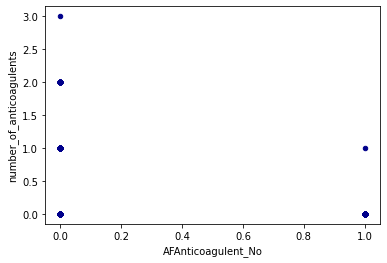

In [42]:
column_names = ["AFAnticoagulentHeparin_Yes", "AFAnticoagulentVitK_Yes", 
                "AFAnticoagulentDOAC_Yes"]

filtered_data["number_of_anticoagulents"] = (
                                    filtered_data[column_names].sum(axis=1))

ax1 = filtered_data.plot.scatter(x='AFAnticoagulent_No',
                                 y='number_of_anticoagulents',
                                 c='DarkBlue')

How many patients have one recorded, when expected none?

In [43]:
mask1 = filtered_data["AFAnticoagulent_No"] == 1
mask2 = filtered_data["number_of_anticoagulents"] > 0
mask = mask1 * mask2
print(f"Number of patients that have one anticoagulent recorded, when expected none:"
      f" {mask.sum()}")
print()
filtered_data[column_names][mask]

Number of patients that have one anticoagulent recorded, when expected none: 1



,AFAnticoagulentHeparin_Yes,AFAnticoagulentVitK_Yes,AFAnticoagulentDOAC_Yes
146109,0,0,1


So only 1 patient.

When 'AFAnticoagulent_Yes']==1, would expect all the options to be Y or N, but some are recording all missing

In [44]:
mask1 = filtered_data["AFAnticoagulent_Yes"] == 1
mask2 = filtered_data["number_of_anticoagulents"] == 0
mask = mask1 * mask2
print(f"Number of patients have anticoagulent recorded as Yes, but none of the "
      f"three are recorded as Yes: {mask.sum()}")

Number of patients have anticoagulent recorded as Yes, but none of the three are recorded as Yes: 16110


For just the patients recorded as having AF anticoagulent, the number of the three recorded as yes


<AxesSubplot:>

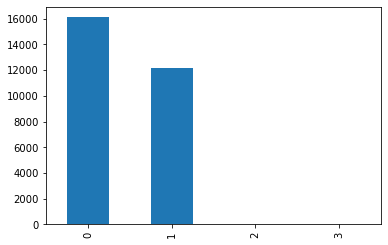

In [45]:
print(f'For just the patients recorded as having AF anticoagulent, the number '
      f'of the three recorded as yes')
pd.value_counts(filtered_data["number_of_anticoagulents"][mask1]).plot.bar()

In [46]:
pd.value_counts(filtered_data["number_of_anticoagulents"][mask1])

0    16110
1    12171
2       29
3        1
Name: number_of_anticoagulents, dtype: int64

Do any patient receiving an AFAnticoagulants recieve thrombolysis?

In [47]:
filtered_data["S2Thrombolysis"][filtered_data["number_of_anticoagulents"]==3]

232676    0
Name: S2Thrombolysis, dtype: int64

In [48]:
print("Of those patients that are recorded as 'Yes' have AFAnticoagulents, here"
      " are the number of individual coagulants their recieve and which have "
      "thrombolysis")
groupby = filtered_data[mask1].groupby(
                        ["number_of_anticoagulents", "S2Thrombolysis"]).size()
groupby

Of those patients that are recorded as 'Yes' have AFAnticoagulents, here are the number of individual coagulants their recieve and which have thrombolysis


number_of_anticoagulents  S2Thrombolysis
0                         0                 15412
                          1                   698
1                         0                 11740
                          1                   431
2                         0                    28
                          1                     1
3                         0                     1
dtype: int64

In [49]:
for n_ac in range(4):
    try:
        propn = groupby[n_ac][1]/(groupby[n_ac][0]+groupby[n_ac][1])
        print(f"Proportion of patients ('Yes' have AFAnticoagulents) who "
              f"recieve {n_ac} anticoagulants that receive thrombolysis: "
              f"{round(propn, 4)}")
    except:
        continue

Proportion of patients ('Yes' have AFAnticoagulents) who recieve 0 anticoagulants that receive thrombolysis: 0.0433
Proportion of patients ('Yes' have AFAnticoagulents) who recieve 1 anticoagulants that receive thrombolysis: 0.0354
Proportion of patients ('Yes' have AFAnticoagulents) who recieve 2 anticoagulants that receive thrombolysis: 0.0345


In [50]:
print("For all patients, here"
      " are the number of individual coagulants their recieve and which have "
      "thrombolysis")
groupby = filtered_data.groupby(
                        ["number_of_anticoagulents", "S2Thrombolysis"]).size()
groupby

For all patients, here are the number of individual coagulants their recieve and which have thrombolysis


number_of_anticoagulents  S2Thrombolysis
0                         0                 199359
                          1                  27944
1                         0                  11741
                          1                    431
2                         0                     28
                          1                      1
3                         0                      1
dtype: int64

For all patients, show the proportion of patients receive thrombolysis by number of anticoagulants taken

In [51]:
for n_ac in range(4):
    try:
        propn = groupby[n_ac][1]/(groupby[n_ac][0]+groupby[n_ac][1])
        print(f"Proportion of all patients who recieve {n_ac} anticoagulants "
              f"that receive thrombolysis: {round(propn, 4)}")
    except:
        continue

Proportion of all patients who recieve 0 anticoagulants that receive thrombolysis: 0.1229
Proportion of all patients who recieve 1 anticoagulants that receive thrombolysis: 0.0354
Proportion of all patients who recieve 2 anticoagulants that receive thrombolysis: 0.0345


For patients that have only 1 AFAnticolagulent recorded, is there a difference in the thrombolysis rate for the chosen anticoagulant taken?

In [52]:
mask1 = filtered_data["number_of_anticoagulents"]==1

column_names = ["AFAnticoagulentHeparin_Yes", "AFAnticoagulentVitK_Yes", "AFAnticoagulentDOAC_Yes"]

for col_name in column_names:
    print (f"Info for {col_name} = 1")

    mask2 = filtered_data[col_name]==1
    mask = mask1 * mask2
    groupby = filtered_data[mask].groupby(
                            ["S2Thrombolysis"]).size()
    print ()
    print(groupby)

    propn = groupby[1]/(groupby[0]+groupby[1])
    print ()
    print(f"Proportion of patients who recieve {col_name} "
          f"that receive thrombolysis: {round(propn, 4)}")

Info for AFAnticoagulentHeparin_Yes = 1

S2Thrombolysis
0    185
1     12
dtype: int64

Proportion of patients who recieve AFAnticoagulentHeparin_Yes that receive thrombolysis: 0.0609
Info for AFAnticoagulentVitK_Yes = 1

S2Thrombolysis
0    4288
1     229
dtype: int64

Proportion of patients who recieve AFAnticoagulentVitK_Yes that receive thrombolysis: 0.0507
Info for AFAnticoagulentDOAC_Yes = 1

S2Thrombolysis
0    7268
1     190
dtype: int64

Proportion of patients who recieve AFAnticoagulentDOAC_Yes that receive thrombolysis: 0.0255


In [53]:
mask1 = filtered_data["number_of_anticoagulents"]==1
mask2 = filtered_data["AFAnticoagulentVitK_Yes"]==1
mask = mask1 * mask2
groupby = filtered_data[mask].groupby(
                        ["S2Thrombolysis"]).size()
print(groupby)

propn = groupby[1]/(groupby[0]+groupby[1])

print(f"Proportion of patients who recieve VitK "
      f"that receive thrombolysis: {round(propn, 4)}")


S2Thrombolysis
0    4288
1     229
dtype: int64
Proportion of patients who recieve VitK that receive thrombolysis: 0.0507


In [54]:
mask1 = filtered_data["number_of_anticoagulents"]==1
mask2 = filtered_data["AFAnticoagulentDOAC_Yes"]==1
mask = mask1 * mask2
groupby = filtered_data[mask].groupby(
                        ["S2Thrombolysis"]).size()
print(groupby)

propn = groupby[1]/(groupby[0]+groupby[1])

print(f"Proportion of patients who recieve DOAC "
      f"that receive thrombolysis: {round(propn, 4)}")

S2Thrombolysis
0    7268
1     190
dtype: int64
Proportion of patients who recieve DOAC that receive thrombolysis: 0.0255


### Feature: S2NewAFDiagnosis

Look at the three columns: S2NewAFDiagnosis_No, S2NewAFDiagnosis_Yes, S2NewAFDiagnosis_missing

Is there a definitive link to the column "AtrialFibrillation_Yes"?

Wonder whether all patients with already a "AtrialFibrillation_Yes" would have a new diagnosis of Atrial Fibrillation recorded as missing - Yes (see scatter plot below)

Then for those that came in with a "AtrialFibrillation_No", would they all need S2NewAFDiagnosis to be completed as Yes or No?

Not the case. It seems that only patients with a "AtrialFibrillation_No" can get a "S2NewAFDiagnosis", but that not all of them do. So only those that present with a symptom, say dizzy spell.


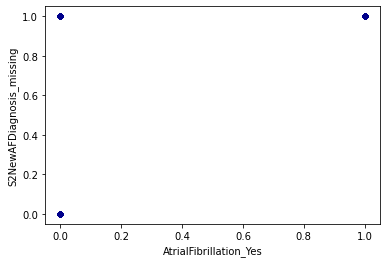

In [55]:
ax1 = filtered_data.plot.scatter(x="AtrialFibrillation_Yes",
                                 y="S2NewAFDiagnosis_missing",
                                 c='DarkBlue')

Count occurences at each of these three points

AtrialFibrillation_Yes vs S2NewAFDiagnosis_missing


<AxesSubplot:>

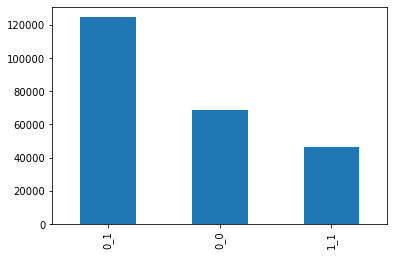

In [56]:
v1 = 'AtrialFibrillation_Yes'
v2 = 'S2NewAFDiagnosis_missing'

print(f'{v1} vs {v2}')

# a series to use for counting- formatted as cat1_cat2
ts = (filtered_data["AtrialFibrillation_Yes"].astype(str) + '_' + filtered_data["S2NewAFDiagnosis_missing"].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

All patients with already a "AtrialFibrillation_Yes" would have a new diagnosis of Atrial Fibrillation recorded as missing (bar "1_1", count ~ 50,000).

However for the remaining patients that arrive without AtrialFibrillation, ~120000 patients had S2NewAFDiagnosis recorded as missing (bar "0_1") and ~70,000 had S2NewAFDiagnosis recorded as not missing (bar "0_0") - so either Yes or No.

So not all patients that came without a prior AF diagnosis gets a No or Yes on arrival.

A NewAF may only be instigated when there's a symptom to require it -eg if patent having dizzy spell.

### S2StrokeType_Infarction vs. S2StrokeType_Primary Intracerebral Haemorrhage

We were expecting this to be highlighted by the correlation matrix. We needed to slacken the range to 0.97 - 1.03 to  also identify:
S2StrokeType_Infarction vs. S2StrokeType_Primary Intracerebral Haemorrhage

This did not come up as there is a third feature linked to these two: S2StrokeType_missing is also part of this group (as only one of these three has a 1, the rest 0). As there are only 1068 patients with S2StrokeType_missing = 1, that's why the correlation between Infarction and Haemorrhage is strong, but not 1.

In [57]:
corr_matrix.loc["S2StrokeType_Infarction"]["S2StrokeType_Primary Intracerebral Haemorrhage"]

-0.9797280879828801

In [58]:
corr_matrix.loc["S2StrokeType_Infarction"]["S2StrokeType_missing"]

-0.17581538586683762

In [59]:
corr_matrix.loc["S2StrokeType_Primary Intracerebral Haemorrhage"]["S2StrokeType_missing"]

-0.024960097915228564

We identified that S2StrokeType_missing = 1 when, and only when, 'S2BrainImagingTime_min' = 9999
So is the stroke type diagnosis is missing for only the patients that have not had a scan (see below).

This is in 1068 of the full cases (and 296 of the filtered patient cases that the model sees).

S2BrainImagingTime_min==9999_S2StrokeType_missing


<AxesSubplot:>

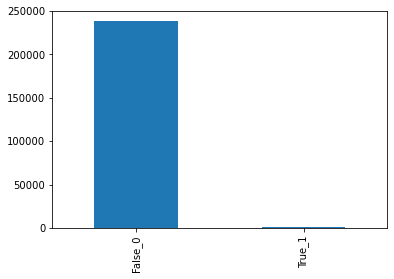

In [60]:
v1 = 'S2BrainImagingTime_min==9999'
v2 = 'S2StrokeType_missing'

print(f'{v1}_{v2}')

# a series to use for counting- formatted as cat1_cat2
s1 = filtered_data['S2BrainImagingTime_min'] == 9999
ts = (s1.astype(str) + '_' + filtered_data['S2StrokeType_missing'].astype(str))
# and plot the counts of the groups
ts.value_counts().plot(kind = 'bar')

Yes, these two features are linked. When 'S2BrainImagingTime_min' = 9999, means no scan was taken, and so S2StrokeType is missing.

In [61]:
# Two ways to calculate this number
mask = filtered_data['S2BrainImagingTime_min']==9999
print(mask.sum())
df1 = filtered_data['S2StrokeType_missing'][mask]
print(df1.sum())

mask = filtered_data['S2StrokeType_missing']==1
print(mask.sum())
df1 = filtered_data['S2BrainImagingTime_min'][mask]
print(df1.sum()/9999)

1068
1068
1068
1068.0


Do we need to include patients in the dataset that do not get scanned?

Look at whether these patients are evenly spread across the hosptials, or come from one hospital (as this is a process issue, not a patient issue). Let's use the dataset that is filtered on process times for this.

In [62]:
mask = filtered_process_data['S2BrainImagingTime_min']==9999
print(f"This would remove {mask.sum()} patients from the model dataset")
df1 = filtered_process_data['S2StrokeType_missing'][mask]
df1.sum()

This would remove 296 patients from the model dataset


296

Checking that it's the same both ways (whenever 'S2StrokeType_missing'==1 then 'S2BrainImagingTime_min'==9999, and whenever 'S2BrainImagingTime_min'==9999 then 'S2StrokeType_missing'==1)

In [63]:
mask = filtered_process_data['S2StrokeType_missing']==1
print(mask.sum())
df1 = filtered_process_data['S2BrainImagingTime_min'][mask]
df1.sum()/9999

296


296.0

In [64]:
a = (df1.sum()/9999)/filtered_process_data.shape[0]
print(f"Looking at removing {a*100}% of the patients")

Looking at removing 0.2913013098717684% of the patients


How are these patient spread across the hosptials?

In [65]:
df2 = filtered_process_data['StrokeTeam'][mask]
print(f"There are {df2.nunique()} hospitals that would have patients removed")

There are 85 hospitals that would have patients removed


The counts of patients per hosptial

In [66]:
s1 = df2.value_counts()
s1.head(10)

CQAAX8797Z    23
IUMNL9626U    18
EQZZZ5658G    11
VKKDD9172T    11
VZOCK3505U    11
UALFR2142B    11
VZZSN1825O     9
XDAFB7350M     9
QWKRA8499D     9
GWOXR9160G     8
Name: StrokeTeam, dtype: int64

The proportions of patients per hosp

In [67]:
s2 = filtered_process_data['StrokeTeam'].value_counts()
df3 = pd.concat([s1.rename("no_scan_diagnosis"), s2.rename('admissions')], axis=1)
df3["proportion_not_scanned"] = df3["no_scan_diagnosis"]/df3['admissions']
df3.sort_values("proportion_not_scanned", ascending=False,inplace=True)
df3.head(15)

,no_scan_diagnosis,admissions,proportion_not_scanned
IUMNL9626U,18.0,481,0.037422
CQAAX8797Z,23.0,741,0.031039
HZMLX7970T,7.0,254,0.027559
QZMCK3259S,8.0,423,0.018913
VZZSN1825O,9.0,618,0.014563
LFPMM4706C,5.0,403,0.012407
VZOCK3505U,11.0,911,0.012075
EQZZZ5658G,11.0,995,0.011055
XQAGA4299B,7.0,654,0.010703
QNARI2373R,6.0,585,0.010256


Decided to remove the patients that were not scanned and so do not have a stroke type. So only include in the dataset patients that get scanned. This removes 0.3% of the patients.

Only need to keep "S2StrokeType_Infarction"

Remove "S2StrokeType_missing"\
Remove "S2StrokeType_Primary Intracerebral Haemorrhage"


### Create list of the column names to drop from the dataset
(due to having a near perfect correlation with another feature)

In [68]:
columns_to_drop = ['MoreEqual80y_No','S1Gender_Male','S1OnsetInHospital_No',
                   'CongestiveHeartFailure_No','Hypertension_No',
                   'AtrialFibrillation_No', 'Diabetes_No', 'StrokeTIA_No',
                   'AFAntiplatelet_missing',
                   'S1ArriveByAmbulance_missing',
                   'S2StrokeType_missing',
                   'S2StrokeType_Primary Intracerebral Haemorrhage']

filtered_data.drop(columns=columns_to_drop, inplace=True)

Check the correlation matrix again to see whether there are any near perfectly correlated features.

In [69]:
corr_matrix = filtered_data.corr()

# Get list of index positions i.e. row & column of all occurrences of 1 in the dataframe, not on the diagonal
min_value = 0.99
max_value = 1.01
listOfPositions = getIndexesRange(corr_matrix.abs(), min_value, max_value, True)

print(f'There are {len(listOfPositions)} feature pairings with correlation in range {min_value} to {max_value} (+/-) in Dataframe : ')
listOfPositions

There are 12 feature pairings with correlation in range 0.99 to 1.01 (+/-) in Dataframe : 


[('AFAnticoagulentDOAC_missing', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentHeparin_No', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentVitK_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentDOAC_missing'),
 ('AFAnticoagulentHeparin_No', 'AFAnticoagulentDOAC_missing'),
 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentDOAC_missing'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentHeparin_No'),
 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentHeparin_No'),
 ('AFAnticoagulentHeparin_missing', 'AFAnticoagulentHeparin_No'),
 ('AFAnticoagulentVitK_missing', 'AFAnticoagulentHeparin_missing'),
 ('AFAnticoagulentDOAC_missing', 'AFAnticoagulentHeparin_missing'),
 ('AFAnticoagulentHeparin_No', 'AFAnticoagulentHeparin_missing')]

Dropping these columns has informed, and will be included in, "1_process_and_impute.ipynb"

### Interested to know the max value for these two features about process duration

In [70]:
filtered_data[['S2BrainImagingTime_min', 'S1OnsetToArrival_min']].max()

S2BrainImagingTime_min      175742.0
S1OnsetToArrival_min      62064145.0
dtype: float64

In [71]:
filtered_process_data[['S2BrainImagingTime_min', 'S1OnsetToArrival_min']].max()

S2BrainImagingTime_min    87885.0
S1OnsetToArrival_min       9999.0
dtype: float64

## Do we want to restrict the patients to those with a certain onset to scan time?

The SHAP plots show time to scan as having a much wider contribution to the outcome, masking the others. Is this becasue this is the only feature that has such a wide range? We've already restricted the dataset to only having patients with an arrival tiem of less than 4 hours (and their stroke onset not in hospital).

I don't think another feature exists, other thant he scan time, that is not restricted (others are binary, or age/scores which are both naturally limited).

What's the longest onset to scan time for a patient that recieves thrombolysis? (look at both datasets - one filtered by hospital admissions, and the other also filtered for onset to arrival times)

In [72]:
mask = filtered_data['S2Thrombolysis'] == 1
filtered_data[mask][['S2BrainImagingTime_min', 'S1OnsetToArrival_min']].max()

S2BrainImagingTime_min     492.0
S1OnsetToArrival_min      9999.0
dtype: float64

In [73]:
mask = filtered_process_data['S2Thrombolysis'] == 1
filtered_process_data[mask][['S2BrainImagingTime_min', 'S1OnsetToArrival_min']].max()

S2BrainImagingTime_min     492.0
S1OnsetToArrival_min      9999.0
dtype: float64

<AxesSubplot:>

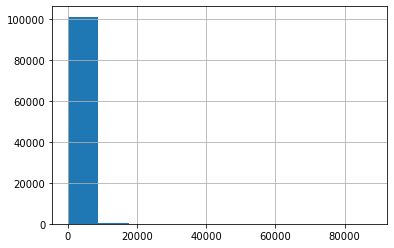

In [74]:
filtered_process_data['S2BrainImagingTime_min'].hist()

<AxesSubplot:>

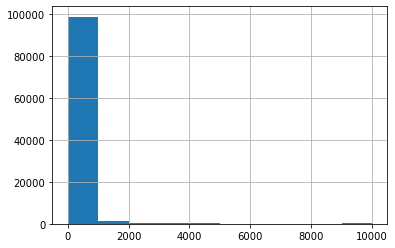

In [75]:
mask = filtered_process_data['S2BrainImagingTime_min'] <= 10000
filtered_process_data[mask]['S2BrainImagingTime_min'].hist()

<AxesSubplot:>

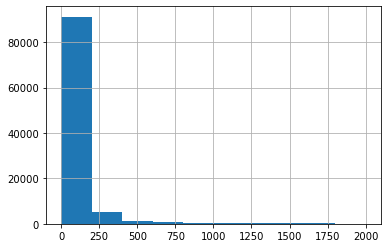

In [76]:
mask = filtered_process_data['S2BrainImagingTime_min'] <= 2000
filtered_process_data[mask]['S2BrainImagingTime_min'].hist()

We've decided not to restrict the patients based on their scan time. The other features we restrict are the features that are outside of the hospitals control (onset location, arrival time). 